# LOGISTIC UNIVARIATE

### IMPORTING HEADER FILES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.shape

(768, 9)

### ANALYSING THE DATA

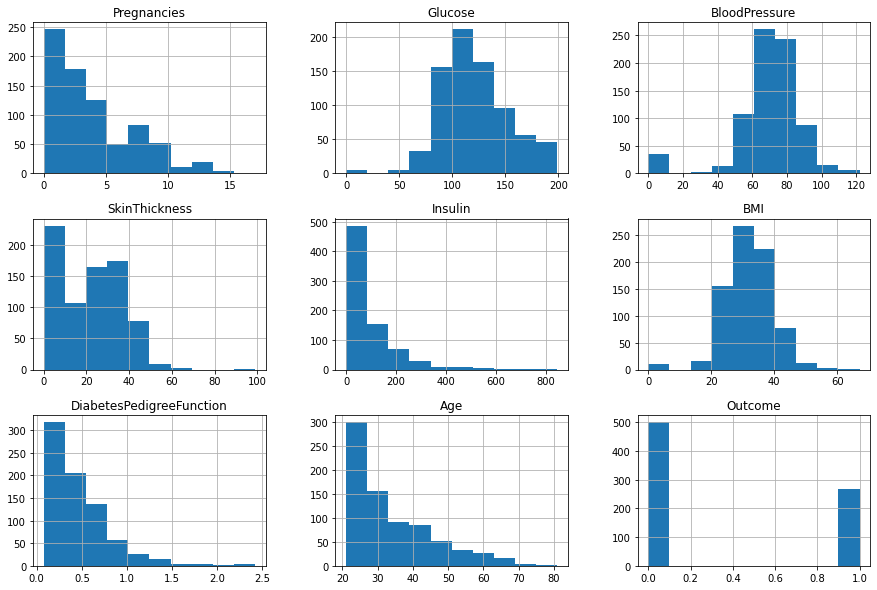

In [3]:
df.hist(figsize=(15,10))
plt.show()

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### CHECKING THE CORRELATION OF DATA WITH THE TARGET

In [5]:
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


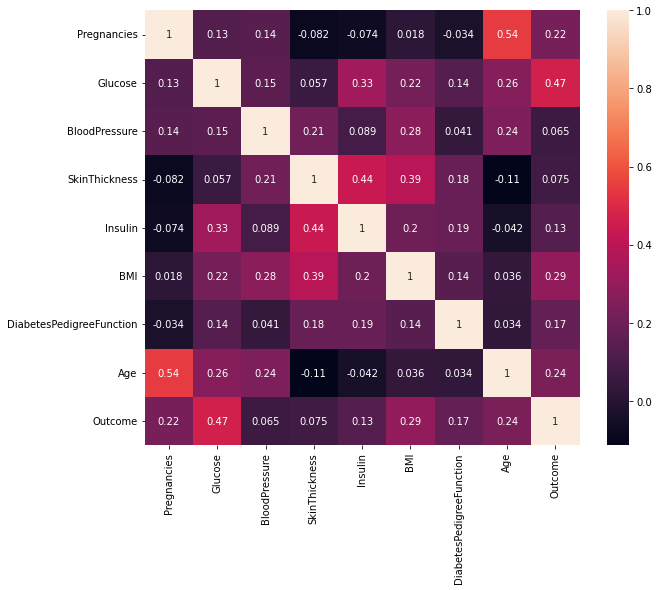

In [6]:
plt.figure(figsize=(10,8))
sn.heatmap(correlation, annot=True, square=True)
plt.show()

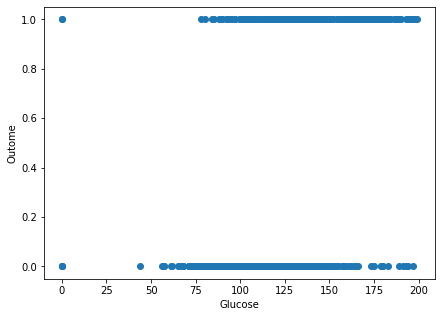

In [7]:
plt.figure(figsize=(7,5))
plt.xlabel('Glucose')
plt.ylabel('Outome')
plt.scatter(df.Glucose,df.Outcome)
plt.show()

### REMOVING THE OUTLIERS

In [8]:
max_threshold=df['Glucose'].quantile(0.95)
min_threshold=df['Glucose'].quantile(0.05)
df=df[(df['Glucose']>min_threshold) & (df['Glucose']<max_threshold)]

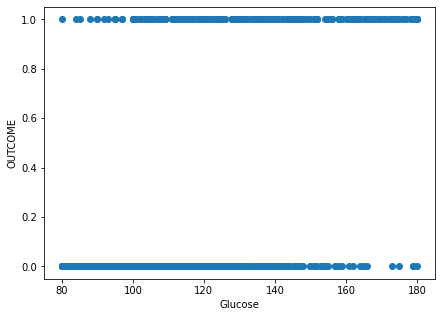

In [9]:
plt.figure(figsize=(7,5))
plt.xlabel('Glucose')
plt.ylabel('OUTCOME')
plt.scatter(df.Glucose,df.Outcome)
plt.show()

In [10]:
df.shape

(686, 9)

### SEPARTING THE TARGET 

In [11]:
target=df[['Outcome']]
target

,Outcome
0,1
1,0
3,0
4,1
5,0
...,...
763,0
764,0
765,0
766,1


In [12]:
target.shape

(686, 1)

In [13]:
df = df.drop(['Outcome'],axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### NORMALISING THE DATA

In [14]:
df=(df-df.mean())/df.std()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.640961,1.112488,0.149974,0.928586,-0.729675,0.200721,0.483955,1.465549
1,-0.831575,-1.418545,-0.158518,0.547105,-0.729675,-0.676795,-0.360430,-0.168774
3,-0.831575,-1.257845,-0.158518,0.165624,0.156434,-0.488756,-0.923354,-1.028944
4,-1.126083,0.670562,-1.495318,0.928586,0.854009,1.391637,5.565566,0.003260
5,0.346454,-0.173116,0.252805,-1.296721,-0.729675,-0.802155,-0.819335,-0.254791
...,...,...,...,...,...,...,...,...
763,1.818991,-0.775743,0.355635,1.755129,0.967129,0.112970,-0.911116,2.583770
764,-0.537068,0.067935,0.047143,0.419945,-0.729675,0.601872,-0.394083,-0.512842
765,0.346454,0.027759,0.149974,0.165624,0.326114,-0.726939,-0.684723,-0.254791
766,-0.831575,0.228635,-0.467010,-1.296721,-0.729675,-0.238037,-0.366549,1.207498


### TEST AND TRAIN SPLIT

In [15]:
train = df.iloc[:500,:]
test = df.iloc[500:,:]
target_train = target.iloc[:500,:]
target_test = target.iloc[500:,:]

In [16]:
target_train.shape

(500, 1)

In [17]:
target_test.shape

(186, 1)

### EXTRACTING THE INPUT FEATURES AND TARGET FEATURE

In [18]:
x_train = train[['Glucose']]
y_train = target_train
x_test = test[['Glucose']]
y_test = target_test

In [19]:
x_train.shape

(500, 1)

In [20]:
y_train.shape

(500, 1)

In [21]:
x_test.shape

(186, 1)

In [22]:
y_test.shape

(186, 1)

### DEFINING THE SIGMOID FUNCTION

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### BUILDING THE LOGISTIC MULTIVARIATE MODEL

In [24]:
def model_log_uni(x,y,l=0.01,itr=10000):
        n = x.shape[0]                                   #rows (no. of samples) 
        print("No. of rows in x : ", n)

        m = x.shape[1]                                   #columns (no. of features)
        print("No. of columns in x : ", m)

        x = np.hstack((np.ones((n,1)), x))               #putting a column of all ones
        print("Updated Shape of x after adding a column of 1's: ",x.shape)

        theta = np.zeros((m+1,1))                        #increasing the size of parameter(theta) matrix by 1 row
        print("Shape of theta : ",theta.shape)

        cost_list = []
    
        for i in range(itr):
        
            lines = np.dot(x,theta)
            ypred = sigmoid(lines)                       #converting the linear function to sigmoid
            error = ypred-y
                                                         #cost function
            cost = -(1/n)* np.sum(y*np.log(ypred) +(1-y)*np.log(1-ypred))

            theta = theta - l*((1/n) * np.dot(x.T,error))

            cost_list.append(cost)
        
        return theta,cost_list    

### CALLING THE LOGISTIC MODEL  FUNCTION

In [25]:
theta,cost_list = model_log_uni(x_train,y_train)

No. of rows in x :  500
No. of columns in x :  1
Updated Shape of x after adding a column of 1's:  (500, 2)
Shape of theta :  (2, 1)


### FINAL PARAMETERS

In [26]:
print("Final parameters after all the iterations of gradient descent :\n ",theta)

Final parameters after all the iterations of gradient descent :
  [[-0.77704266]
 [ 0.94396829]]


In [27]:
print("Final Cost : ",cost_list[-1])

Final Cost :  Outcome    0.552389
dtype: float64


### ERROR PLOT

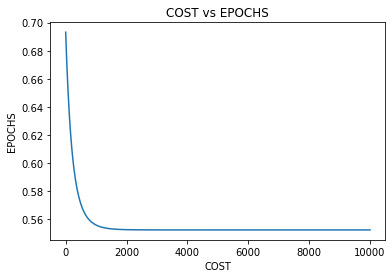

In [28]:
plt.title('COST vs EPOCHS')
plt.ylabel('EPOCHS')
plt.xlabel('COST')
plt.plot(cost_list)
plt.show()

### CLASSIFYING THE PREDICTION >= 0.5 TO '1' AND <0.5 TO '0' 

In [29]:
def pred_class(X, theta):
    prediction = []
    lines = np.dot(X,theta)
    y_pred = sigmoid(lines)
    for i in y_pred:
        if i>=0.5:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

### MAKING THE FIRST COLUMN OF 'x_test' AS ALL 1's

In [30]:
x_test = np.hstack((np.ones((x_test.shape[0],1)), x_test)) 

In [31]:
x_test.shape

(186, 2)

In [32]:
y_pred = pred_class(x_test, theta)

### PREDICTION ON x_test =>y_pred

In [33]:
y_pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

# EVALUATION METRICS

### CHECKING ACCURACY 

In [41]:
def accuracy_1(X, Y, theta):
    
    lines_1 = np.dot(X,theta)
    y_pred_1 = sigmoid(lines_1)
    y_pred_1 = y_pred_1 > 0.5
    
    y_pred_1 = np.array(y_pred_1, dtype='int64')
    acc = (1-np.sum(np.absolute(y_pred_1-Y))/Y.shape[0])*100
    
    print("Accuracy of the model is : ", round(acc,2), "%")
    return y_pred_1

In [42]:
A = accuracy_1(x_test, y_test, theta)

Accuracy of the model is :  Outcome    76.88
dtype: float64 %


In [43]:
A

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

### CHECKING F1-SCORE 

In [45]:
from sklearn.metrics import f1_score
F1_Score = f1_score(y_test, y_pred,average = 'micro')
print("F1 Score of the model is : ",F1_Score)

F1 Score of the model is :  0.7688172043010751
